# Milestone 2 analysis


# Task 1 

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df = pd.read_csv("../../data/raw/Video_game_sales_db.csv")
df


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [30]:
dfNa = pd.read_csv("../../data/raw/Video_game_sales_db.csv",
                  usecols = ["Rank", "Name", "Genre", "NA_Sales", "Year", "Platform"])
dfNa

,Rank,Name,Platform,Year,Genre,NA_Sales
0,1,Wii Sports,Wii,2006.0,Sports,41.49
1,2,Super Mario Bros.,NES,1985.0,Platform,29.08
2,3,Mario Kart Wii,Wii,2008.0,Racing,15.85
3,4,Wii Sports Resort,Wii,2009.0,Sports,15.75
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27
...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.00
16596,16599,Know How 2,DS,2010.0,Puzzle,0.00


In [31]:
dfNa.dropna(axis = 1)
dfNa.reset_index(drop=True)


,Rank,Name,Platform,Year,Genre,NA_Sales
0,1,Wii Sports,Wii,2006.0,Sports,41.49
1,2,Super Mario Bros.,NES,1985.0,Platform,29.08
2,3,Mario Kart Wii,Wii,2008.0,Racing,15.85
3,4,Wii Sports Resort,Wii,2009.0,Sports,15.75
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27
...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.00
16596,16599,Know How 2,DS,2010.0,Puzzle,0.00


In [32]:
dfWii = (
    pd.read_csv("D:/acer/Documents/Academia/UBCO/Y4/DATA301/Labs/course-project-group_6002/data/raw/Video_game_sales_db.csv",
    usecols = ["Rank", "Name", "Genre", "Global_Sales", "Year", "Platform"])
    .loc[lambda x: x["Platform"] == "Wii"] # We love Wii only wanna play Wii
    .loc[lambda x: x["Year"] >= 2000] # Check for only recent games 
    .loc[lambda x: x["Rank"] <= 2500] # Nothing ranked lower tan 2500
    .sort_values(by= "Global_Sales", ascending = False) # Cash money check
    .assign(Averaged_Sales = lambda x: x["Global_Sales"]/4) # Average out sales
    .reset_index(drop = True)
)
dfWii

,Rank,Name,Platform,Year,Genre,Global_Sales,Averaged_Sales
0,1,Wii Sports,Wii,2006.0,Sports,82.74,20.6850
1,3,Mario Kart Wii,Wii,2008.0,Racing,35.82,8.9550
2,4,Wii Sports Resort,Wii,2009.0,Sports,33.00,8.2500
3,8,Wii Play,Wii,2006.0,Misc,29.02,7.2550
4,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,28.62,7.1550
...,...,...,...,...,...,...,...
194,2440,Blazing Angels: Squadrons of WWII,Wii,2007.0,Simulation,0.85,0.2125
195,2452,Karaoke Revolution Glee,Wii,2010.0,Misc,0.85,0.2125
196,2467,Harvest Moon: Tree of Tranquility,Wii,2007.0,Simulation,0.84,0.2100
197,2482,WWE SmackDown vs. Raw 2009,Wii,2008.0,Fighting,0.83,0.2075


In [33]:
dfWiiSub = dfWii[["Global_Sales", "Averaged_Sales","Genre"]]
dfWiiSub

,Global_Sales,Averaged_Sales,Genre
0,82.74,20.6850,Sports
1,35.82,8.9550,Racing
2,33.00,8.2500,Sports
3,29.02,7.2550,Misc
4,28.62,7.1550,Platform
...,...,...,...
194,0.85,0.2125,Simulation
195,0.85,0.2125,Misc
196,0.84,0.2100,Simulation
197,0.83,0.2075,Fighting


In [34]:
# Setting the styles of the graphs following
sns.set_style("dark")
sns.set_theme(font_scale = 1, color_codes = True)
plt.figure(figsize=(12, 12))


<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<AxesSubplot:xlabel='Averaged_Sales', ylabel='Genre'>

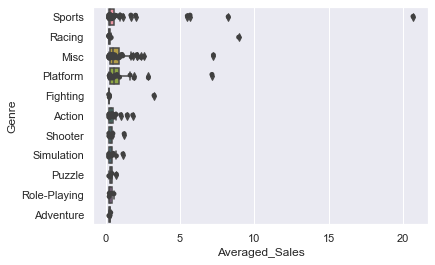

In [35]:
# Investigating Wii average sales per genre after year 2000, only running with games 
# ranked higher than 2500
# this to display the box plot
sns.boxplot(data = dfWiiSub, x = "Averaged_Sales", y = "Genre", whis = 1.5)
# swarm plot to display the datapoints over the box plot
sns.stripplot(data = dfWiiSub, x = "Averaged_Sales", y = "Genre", color = "0.25")

In [36]:
dfClean = (
        pd.read_csv("../../data/raw/Video_game_sales_db.csv",
        usecols = ["Rank", "Name", "Genre", "Global_Sales", "Year", "Platform"]) # So far our only focus of work
        .sort_values(by= "Global_Sales", ascending = False) # Cash money check
        .dropna(axis = 1) # Drop any NA values completely
        .reset_index(drop=True) # Reset index so we don't mess up orders
    )
dfClean

,Rank,Name,Platform,Genre,Global_Sales
0,1,Wii Sports,Wii,Sports,82.74
1,2,Super Mario Bros.,NES,Platform,40.24
2,3,Mario Kart Wii,Wii,Racing,35.82
3,4,Wii Sports Resort,Wii,Sports,33.00
4,5,Pokemon Red/Pokemon Blue,GB,Role-Playing,31.37
...,...,...,...,...,...
16593,16189,BattleForge,PC,Strategy,0.01
16594,16190,Jewel Quest II,PC,Puzzle,0.01
16595,16191,Toro to Morimori,PS3,Misc,0.01
16596,16192,Sonic & All-Stars Racing Transformed,PC,Racing,0.01


In [37]:
def load_and_process(filePath):

    dfClean = (
        pd.read_csv(filePath,
        usecols = ["Rank", "Name", "Genre", "Global_Sales", "Year", "Platform"]) # So far our only focus of work
        .sort_values(by= "Global_Sales", ascending = False) # Cash money check
        .dropna(axis = 0, thresh = 3) # Drop any NA values completely
        .reset_index(drop=True) # Reset index so we don't mess up orders
    )
    
    dfWii = (
        dfClean
        .loc[lambda x: x["Platform"] == "Wii"] # We love Wii only wanna play Wii
        .loc[lambda x: x["Year"] >= 2000] # Check for only recent games
        .loc[lambda x: x["Rank"] <= 2500] # Nothing ranked lower tan 2500
        .assign(Averaged_Sales = lambda x: x["Global_Sales"]/4) # Average out sales
        .sort_values(by= "Global_Sales", ascending = False) # Re-sort in case any vales got changed
        .reset_index(drop = True) # Order things nicely
    )
    return dfWii


In [38]:
load_and_process("../../data/raw/Video_game_sales_db.csv")


,Rank,Name,Platform,Year,Genre,Global_Sales,Averaged_Sales
0,1,Wii Sports,Wii,2006.0,Sports,82.74,20.6850
1,3,Mario Kart Wii,Wii,2008.0,Racing,35.82,8.9550
2,4,Wii Sports Resort,Wii,2009.0,Sports,33.00,8.2500
3,8,Wii Play,Wii,2006.0,Misc,29.02,7.2550
4,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,28.62,7.1550
...,...,...,...,...,...,...,...
194,2440,Blazing Angels: Squadrons of WWII,Wii,2007.0,Simulation,0.85,0.2125
195,2433,Need for Speed: Nitro,Wii,2009.0,Racing,0.85,0.2125
196,2467,Harvest Moon: Tree of Tranquility,Wii,2007.0,Simulation,0.84,0.2100
197,2497,The Price is Right,Wii,2008.0,Misc,0.83,0.2075
